Question 1

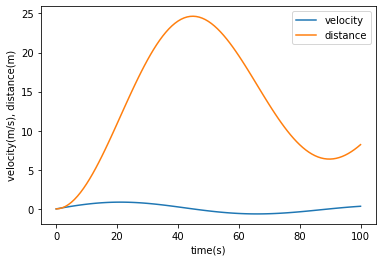

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt


file=open(r'velocities.txt')
t=[]
v=[]

for rows in file:
        rows=rows.split('\t')
        t.append(int(rows[0]))
        v.append(float(rows[1].strip()))
plt.plot(t,v, label='velocity')

#the array x represents distance as a function of time

x=[0]
time=len(t)
sum=0
for i in range(1,time):
    sum=sum+(0.5)*(v[i]+v[i-1])
    x.append(sum)
p=plt.plot(t,x, label='distance')    
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s), distance(m)')

plt.legend()

Question 2

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt



#part a

def integral(interval, down, up):
    val=0
    x=down
    f=0
    num=(up-down)/interval
    for i in range(0,interval+1):
        f=x**4-2*x+1
        x+=num
        if(i==0):
            val+=f
        if(i==interval):
            val+=f
        elif(i%2==0):
            val+=2*f
        elif(i%2==1):
            val+=4*f
    val=val*(num/3)
    return val


print('value of integral for 10 slices:', integral(10,0,2))
#part b

def frac_err(interval,down,up):
    p=((integral(interval,down, up)-4.4)/4.4)*100
    return p
print('error in percent for 10 slices', frac_err(10,0,2))

#part c
print('value of integral for 100 slices:', integral(100,0,2))
print('error in percent for 100 slices', frac_err(100,0,2))

print('value of integral for 1000 slices:', integral(1000,0,2))
print('error in percent for 1000 slices', frac_err(1000,0,2))






    

    
    
    

value of integral for 10 slices: 4.533759999999999
error in percent for 10 slices 3.039999999999972
value of integral for 100 slices: 4.413333376000015
error in percent for 100 slices 0.30303127272760216
value of integral for 1000 slices: 4.401333333337617
error in percent for 1000 slices 0.03030303040038343


Question 3

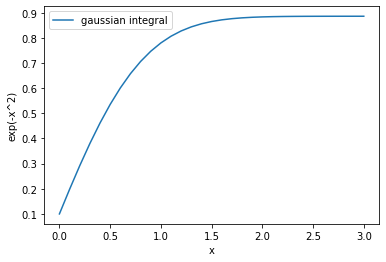

In [24]:
#We take 10 intervals for each 0.1 interval, and apply Simpson's rule
import numpy as np
import math
import matplotlib.pyplot as plt


def integral2(interval, down, up):
    val=0
    x=down
    f=0
    num=(up-down)/interval
    for i in range(0,interval+1):
        f=np.exp(-x**2)
        x+=num
        if(i==0):
            val+=f
        if(i==interval):
            val+=f
        elif(i%2==0):
            val+=2*f
        elif(i%2==1):
            val+=4*f
    val=val*(num/3)
    return val


def gauss(intval_size, down, up):
    g=[]
    val=0
    num=int((up-down)/intval_size)
    j=down
    for i in range(0,num+1):
        val+=integral2(10000, j, j+intval_size)
        g.append(val)
        j+=intval_size
    return [g,val]
         
x=np.linspace(0,3,31)

plt.plot(x,gauss(0.1,0,3)[0], label='gaussian integral')
plt.xlabel('x')
plt.ylabel('exp(-x^2)')
plt.legend()
    
#print(integral2(30, 0, 3))

Question 5

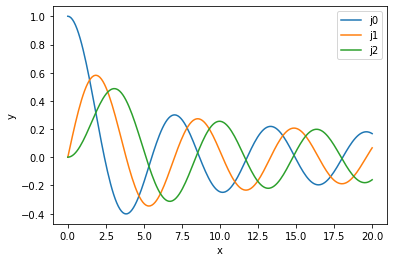

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

def bessel(m,x,N):
    val=0
    y=0
    f=0
    num=math.pi/N
    for i in range(0,N+1):
        f=math.cos(m*y-x*math.sin(y))/math.pi
        y+=num
        if(i==0):
            val+=f
        if(i==N+1):
            val+=f
        elif(i%2==0):
            val+=2*f
        elif(i%2==1):
            val+=4*f
    val=val*(num/3)
    return val

x=np.linspace(0,20,200)
j0=[]
j1=[]
j2=[]


for i in range(200):
    j0.append(bessel(0,x[i],1000))
    j1.append(bessel(1,x[i],1000))
    j2.append(bessel(2,x[i],1000))
    
plt.plot(x,j0, label='j0')
plt.plot(x,j1, label='j1')
plt.plot(x,j2, label='j2')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
    
   #part b






            
        
        

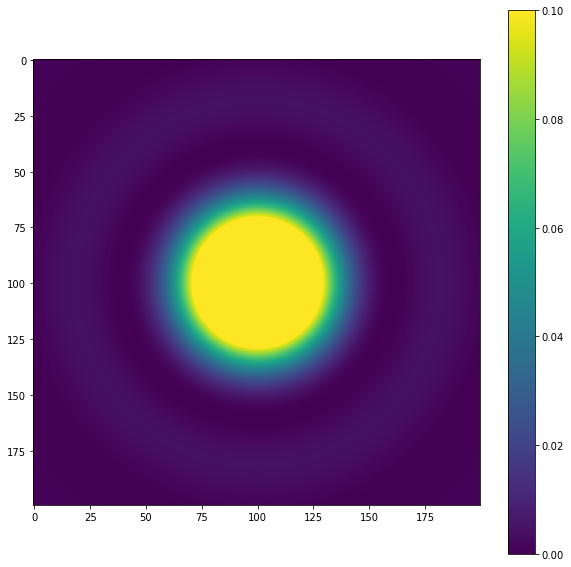

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

wavelng= 0.5 

k=((2*math.pi)/wavelng)

def bessel(m,x,N):
    val=0
    y=0
    f=0
    num=math.pi/N
    for i in range(0,N+1):
        f=math.cos(m*y-x*math.sin(y))/math.pi
        y+=num
        if(i==0):
            val+=f
        if(i==N+1):
            val+=f
        elif(i%2==0):
            val+=2*f
        elif(i%2==1):
            val+=4*f
    val=val*(num/3)
    return val

def rad(x,y):
    r=math.sqrt(x**2+y**2)
    kr=k*r
    return (bessel(1,kr,1000)/kr)**2

x=np.zeros((200,200))

for i in range(1,200):
    for j in range(1,200):
        if(i!=100 or j!=100):
            x[j][i]= rad((i-100)/200,(j-100)/200)
x[100][100]=0.5

plt.figure(figsize=(10,10))
plt.imshow(x, vmax=0.1)
plt.colorbar()


Question 7

In [11]:
#part a


import numpy as np
import matplotlib.pyplot as plt
import math

def integralf(down, up, num):
    step=(up-down)/num
    j=down
    value=0
    for i in range(1, num+1):
        f1=(math.sin(10*math.sqrt(j)))**2
        f2=((math.sin(10*math.sqrt(j+step)))**2)
        value+=((f1+f2)/2)
        j+=step
    return (value*step)

N=4
a=integralf(0,1,1)
b=integralf(0,1,2)
final_int=0
while(np.abs(a-b)>1e-6):
    a=b
    b=integralf(0,1,N)
    N*=2
        
        
print(b)
        

0.4558324138011351


In [ ]:
#part b


import numpy as np
import matplotlib.pyplot as plt
import math


def integralf(down, up, num):
    step=(up-down)/num
    j=down
    value=0
    f2=(math.sin(10*math.sqrt(1)))**2
    for i in range(1, num+1):
        f1=f2
        f2=((math.sin(10*math.sqrt(j+step)))**2)
        value+=((f1+f2)/2)
        j+=step
    return (value*step)


def I(i):
    return integralf(0,1,2**(i-1))


def R(i,m):
    p=0
    if(m==1):
        p=I(i)
    else:
        p=((4**(m))*R(i,m-1)-R(i-1, m-1))/(4**(m)-1)
    return p
    #this rule has been used from the textbook of Newman, it has a recursive mathematical proof which is involved
    
i=3        
print(R(2,1))       
while(i>2):
    for j in range(1,i):
        print(R(i,j), end='')
    if((R(i,i-1)-R(i-1,i-2))<=1e-10):
        break
    print('\n')
    i+=1
    
        

    

Question 8

In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np


#simpson integral function
def integral2(down, up, interval):
    val=0
    x=down
    f=0
    num=(up-down)/interval
    for i in range(0,interval+1):
        f=(math.sin(10*math.sqrt(x)))**2
        x+=num
        if(i==0):
            val+=f
        if(i==interval):
            val+=f
        elif(i%2==0):
            val+=2*f
        elif(i%2==1):
            val+=4*f
    val=val*(num/3)
    return val

N=8
a=integral2(0,1,2)
b=integral2(0,1,4)
final_int=0
while(np.abs(a-b)>1e-6):
    a=b
    b=integral2(0,1,N)
    print(b,N)
    N*=2
    
    
    

            
  




0.36656898106322067 8
0.43913867623358005 16
0.45451843128504416 32
0.45574568635801105 64
0.4558270287586106 128
0.45583218714672114 256
0.4558325107178048 512


Question 9

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w



def f(x):
    return (((x**4)*(math.exp(x)))/(math.exp(x)-1)**2)

print('Put temperature in kelvin:')
T=float(input())

def C_v_norm(T):
    a=0
    b=428/T
    N=50
    x,w=gaussxwab(N,a,b)
    val=0
    for i in range(N):
        val+=(w[i])*(f(x[i]))
    return val

        
        
V=1e-3
rho=6.022e28
theta_D=428
k_b=1.381e-23

C_v= (9*V*rho*k_b)*((T/theta_D)**3)*C_v_norm(T)        
        
print(C_v)

Put temperature in kelvin:
600
2432.5741254976624


Text(0, 0.5, 'Heat Capacity')

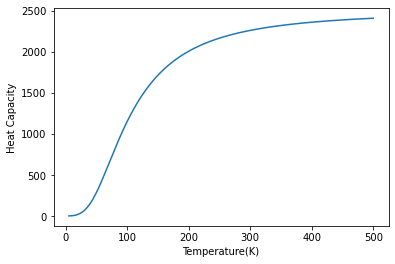

In [6]:
#part b
V=1e-3
rho=6.022e28
theta_D=428
k_b=1.381e-23
val=0
        

C=[]
T=np.linspace(5,500,495)
for i in range(495):
    val= (9*V*rho*k_b)*((T[i]/theta_D)**3)*C_v_norm(T[i])
    C.append(val)
    
plt.plot(T,C)
plt.xlabel('Temperature(K)')
plt.ylabel('Heat Capacity')

    

Question 10

In this case we have:
$$\frac{dx}{dt}=\sqrt{\frac{2(E-V(x))}{m}}$$
implying:
$$dt = \frac{dx}{\sqrt{\frac{2(E-V(x))}{m}}}$$
and integrating we have:
$$\int_{0}^{\frac{T}{4}} dt=\int_{a}^{0}\frac{dx}{\sqrt{\frac{2(E-V(x))}{m}}}$$
giving us:(E=V(a))
$$T=4\int_{a}^{0}\frac{dx}{\sqrt{\frac{2(V(a)-V(x))}{m}}}$$


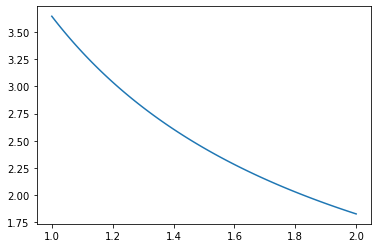

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


def f(x,a):
    return 1/(math.sqrt(2*(a**4-x**4)))
    
    
N=20
def int_a(a,N):
    x,w=gaussxwab(N,0,a)
    val=0
    for i in range(N):
        val+=(w[i])*(f(x[i],a))
    return val
        
a_x=np.linspace(1,2,100)
time=[]
for i in range(0, 100):
    time.append(4*int_a(a_x[i],N))
    
plt.plot(a_x, time, label='')
    


Question 11

Text(0.5, 1.0, 'diffraction profile')

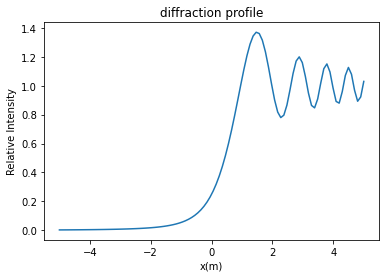

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt

from numpy import ones,copy,cos,tan,pi,linspace

def f1(x):
    return math.cos((math.pi*(x**2)/(2)))
            
def f2(x):
    return math.sin((math.pi*(x**2))/(2))

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

                    
N=50
def C(u,N):
    x,w=gaussxwab(N,0,u)
    val=0
    for i in range(N):
        val+=(w[i])*(f1(x[i]))
    return val
                    
def S(u,N):
    x,w=gaussxwab(N,0,u)
    val=0
    for i in range(N):
        val+=(w[i])*(f2(x[i]))
    return val
                    
                    
wave_length=1
z=3
x=np.linspace(-5,5,100)
u=[]
for i in range(0,100):
    u.append(x[i]*math.sqrt(2/(wave_length*z)))
                    
def rel_I(u,N):
    I=[]    
    for i in range(len(u)):
        I.append((1/8)*((2*C(u[i],N)+1)**2+(2*S(u[i],N)+1)**2))
    return I

plt.plot(x,rel_I(u,N))
        
plt.xlabel('x(m)')
plt.ylabel('Relative Intensity')
plt.title('diffraction profile')
                    

                    

Yes there is significant variation in sound for negative x as it tends to 0.

# Question 12

So, we have:
$$I(\omega)= \frac{\hbar}{4\pi^2c^2} \frac{\omega^3}{e^{\frac{\hbar\omega}{k_BT}}-1}$$
Now, we subtitute $x=\frac{\hbar\omega}{k_BT}$, which makes the integral: $d\omega=\frac{k_BT}{\hbar}dx$ which makes the integral:
$$I= \int_{\text{all} \space \omega} I(\omega)d\omega=\int_0^\infty \frac{\hbar}{4\pi^2c^2} \frac{(\frac{k_BTx}{\hbar})^3}{e^x-1} \frac{k_BT}{\hbar}dx$$
which becomes:
$$I=\int_{0}^{\infty} \frac{k_B^4T^4}{4\pi^2c^2\hbar^3} \frac{x^3}{e^x-1}dx=\frac{k_B^4T^4}{4\pi^2c^2\hbar^3}\int_0^\infty\frac{x^3}{e^x-1}dx$$
giving us the final result. This comes from the fact that tehtotal intensity at a point is due to the combined effect of intesities due to all frequencies.

$\textbf{Part-A}:$

For this we break the integal into 2 parts, 0 to L and L to infinity. L can be made arbitrarily large within numerical limits. For the second integral we have: 
$$\int_{L}^\infty\frac{x^3}{e^x-1} \approx \int_{L}^\infty \frac{x^3}{e^x} = (L^3+3L^2+6L+6)e^{-L}$$
This is easy to do with integration by parts. Now, progressively double L until the quantity, $(L^3+3L^2+6L+6)e^{-L}$, is changing less than 1e-6 after each iteration. We set L to this optimum value and integrate till this L.

Also, when the limit approaches 0, the integrand approaches a $\frac{0}{0}$ form, which can create problems, so, we reduce the expression by L'hopital rule to:(if we take step of 0.1, then this appplies to the 0 containing interval, i.e. 0 to 0.1)
$\int_{\text{first interval}}=\frac{(f(0)+f(1))}{2}\times 0.1$, where $f(x)=3x^2e^{-x}$

In [19]:
#part a

import math
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return (x**3)/(math.exp(x)-1)

#trapezoidal integral
def integral(down, up, num, f):
    step=(up-down)/num
    j=down
    value=0
    f2=f(j)
    for i in range(1, num+1):
        f1=f2
        f2=f(j+step)
        value+=((f1+f2)/2)
        j+=step
    return (value*step)


#optimal L finding
def L(x):
    return (x**3+6*(x**2)+6*x+6)*math.exp(-x)

#define tolerance
tolerance=1e-15

def Opt_L(L):
    l1=1
    l2=2
    while(np.abs(L(l1)-L(l2))>tolerance):
        l1=l2
        l2*=2
    return l2

l=Opt_L(L)


#defining steps#
step=0.0001

#to avoid the 0 interval
def asymp_f(x):
    return 3*(x**2)*(math.exp(-x))
val=((asymp_f(0)+asymp_f(step))*step)/2

#calculate the fincal integral
final_integral=integral(step,l,int(l/step),f)+val

print('The integral value is:', final_integral)
#print(L(64),val)


#methodology: we tolerate an error of 1e-6, we make L bigger, and check the change of the integral. 

The integral value is: 6.49393940226716


In [28]:
#part b

k_b=1.381e-23
c=3e8
hbar=1.05457182e-34


const=((k_b**4))/(4*(math.pi**2)*(c**2)*(hbar**3))

sigma=final_integral*const


print(sigma)

sigma_literature= 5.670374419e-8

error=(np.absolute(sigma-sigma_literature)/sigma_literature)
print('The percent error with recorded values are', 100*error)


5.668291987921345e-08
The error with recorded values are 0.0367247543950006


# Question 13

Text(0.5, 1.0, 'harmonic oscillator wavefunctions')

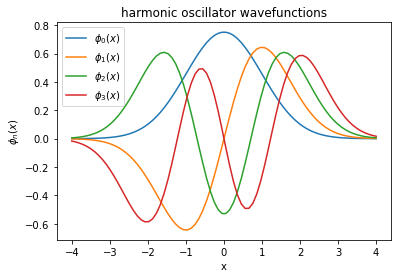

In [1]:
#part a

import math
import numpy as np
import matplotlib.pyplot as plt

def H(n,x):
    if(n==0):
        return 1
    if(n==1):
        return 2*x
    else:
        H=[1,2*x]
        for i in range(2,n+1):
            H.append(2*x*H[i-1]-2*(i-1)*H[i-2])
    return H[n]
    
def phi(n,x):
    val=(2**n)*(math.factorial(n))*(math.sqrt(math.pi))
    const=1/math.sqrt(val)
    return const*(math.exp(-(x**2/2)))*H(n,x)


x=np.linspace(-4,4,80)

phi_0=[]
phi_1=[]
phi_2=[]
phi_3=[]


for i in range(80):
    phi_0.append(phi(0,x[i]))
    phi_1.append(phi(1,x[i]))
    phi_2.append(phi(2,x[i]))
    phi_3.append(phi(3,x[i]))
    
plt.plot(x, phi_0, label="$\phi_0(x)$")
plt.plot(x, phi_1, label="$\phi_1(x)$")
plt.plot(x, phi_2, label="$\phi_2(x)$")
plt.plot(x, phi_3, label="$\phi_3(x)$")

plt.xlabel('x')
plt.ylabel('$\phi_n(x)$')
plt.legend()
plt.title('harmonic oscillator wavefunctions')
    

Text(0.5, 1.0, '30th harmonic')

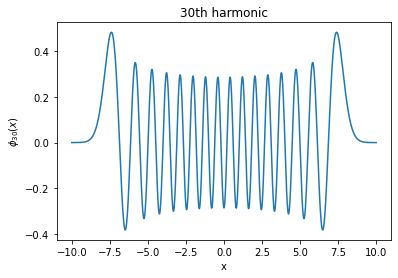

In [2]:
#part b

x=np.linspace(-10,10,1000)
phi30=[]

for i in range(1000):
    phi30.append(phi(30, x[i]))
    
plt.plot(x, phi30)
plt.xlabel('x')
plt.ylabel('$\phi_{30}(x)$')
plt.title('30th harmonic')

In [6]:
import numpy as np
import math
from numpy import ones,copy,cos,tan,pi,linspace


def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w



def error_func(x,n,phi):
    return (x**2)*((np.absolute(phi(n,x)))**2)

#We start from -1 to 1 then keep doubling until the value does not change beyond the chosen tolerance

N=100
def squared_error(l,n,phi):
    x,w=gaussxwab(N,-l,l)
    val=0
    for i in range(N):
        val+=(w[i])*(error_func(x[i],n,phi))
    return val

tolerance=1e-6

def Uncertainty(n,phi):
    l1=1
    l2=2
    while(np.absolute(squared_error(l2,n,phi)-squared_error(l1,n,phi))>tolerance):
        l1=l2
        l2*=2
    return l2

print('uncertainty in $\phi_{5}(0)$:', math.sqrt(squared_error(Uncertainty(5,phi),5,phi)))

    


uncertainty in $\phi_{5}(0)$: 2.345207875705646


# Question 15

Text(0.5, 1.0, 'behaviour of Gamma integrand')

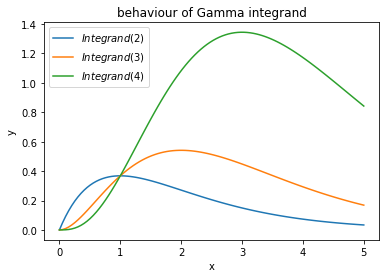

In [15]:
#part a
import numpy as np
import math
import matplotlib.pyplot as plt

def gamma(n,x):
    return x**(n-1)*math.exp(-x)

gamma_2=[]
gamma_3=[]
gamma_4=[]

x=np.linspace(0,5,100)

for i in range(0,100):
    gamma_2.append(gamma(2,x[i]))
    gamma_3.append(gamma(3,x[i]))
    gamma_4.append(gamma(4,x[i]))
    
plt.plot(x,gamma_2, label='$Integrand(2)$')
plt.plot(x,gamma_3, label='$Integrand(3)$')
plt.plot(x,gamma_4, label='$Integrand(4)$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('behaviour of Gamma integrand')

$\textbf{Part B}$

In this case we differentiate the integrand. 
$$\frac{d}{dx} x^{a-1}e^{-x}= (a-1)x^{a-2}e^{-x} - x^{a-1}e^{-x}$$
for maxima it should be 0:
$$(a-1)x^{a-2}e^{-x} - x^{a-1}e^{-x}=0 \implies (a-1) - x =0$$
if we cancel, $x^{a-2}e^{-x}$ from both sides, given x is not exactly 0, which is also evident from the solution which gives: $x=a-1$, until $a=1$ which basically makes the integrand simply $e^{-x}$, and this analysis becomes unnecessary itself.

$\textbf{Part C}$

Now, we have: 
$$\frac{x}{x+c}=\frac{1}{2} \implies 2x =x +c  \implies c=x$$
The maxima occurs at $x=a-1$, which meand we have to set $c=a-1$, diffrernt choices of $c$ for different choices of $a$.

$\textbf{Part D}$

We represent the expression as:
$$x^{a-1}e^{-x}= e^{(a-1)lnx}e^{-x}=e^{[(a-1)lnx-x]}$$

This works better because if we first calculate $(a-1)lnx -x$, then the chances of numerical errors are lesser, because of the somewhat similar behavior of lnx and x. It basically helps to nullify the increasing effect of lnx and decreasing effect of -x in a single computation without running into the problem of calculating something big and something small at different times and then adding these to get the result.

$\textbf{Part E}$

We subtitute $y=\frac{x}{x+a-1}$ which when reversed looks like: $x=\frac{(a-1)y}{1-y}$, We substitute this into the integration equation to obtain:
$$\Gamma(a)= (a-1)^{a}\int_0^1\frac{e^{\frac{(1-a)y}{1-y}}}{(1-y)^{1+a}} dy$$
We clearly see that the denominator goes to 0 in the vicinity of y=1, but the numerator goes to 0 faster(exponentially)than the denominator(geometrically). So, we can avoid integrating till 1 altogether.

The approach we take is to integrate from 0 to 1/2, then 1/2 to 3/4, and so on. For the ith integral we choose, the lower limit to be $1-2^{1-i}$ and the upper limit is $1-2^{-i}$. We keep doing it until the jth integral is less than a certain tolerance value, say 1e-6.

In [47]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(a,y):
    t_1=(a-1)*math.log((y*(a-1))/(1-y))
    t_2=-((a-1)*y)/(1-y)
    t_3=-2*math.log((1-y))
    return math.exp(t_1+t_2+t_3)

#we choose gaussian quadrature as it takes lesser number of iterations, for N=100 points.
    
    
from numpy import ones,copy,cos,tan,pi,linspace


def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


def int_gamma(a, low, high, N):
    x,w=gaussxwab(N, low, high)
    val=0
    for i in range(N):
        val+=(w[i])*(f(a, x[i]))
    return val*(a-1)

def Gamma(a, tolerance, N):
    value=0
    low=1e-6
    high=1/2
    i=1
    while(int_gamma(a, low, high, N)>tolerance):
        value+=int_gamma(a, low, high, N)
        i+=1
        low=high
        high=1-2**(-i)  
    return value

N=100
tolerance =1e-6

#part b and c combined

print('Gamma(3/2)is:', Gamma(3/2, tolerance, N))
print('Gamma(3)is:', Gamma(3, tolerance, N))
print('Gamma(6)is:', Gamma(6, tolerance, N))
print('Gamma(10)is:', Gamma(10, tolerance, N))
    


    


Gamma(3/2)is: 0.8862261836929437
Gamma(3)is: 1.9999999999099793
Gamma(6)is: 119.99999996156383
Gamma(10)is: 362880.0


# Question 5

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(x):
    return x**4-2*x+1
    
def integral_t(low, high, N, f):
    step=(high-low)/N
    j=low
    value=0
    for i in range(N):
        value+=0.5*(f(j)+f(j+step))
        j+=step
    return value*step
        
print(integral_t(0,2,20,f))

error_1=integral_t(0,2,20,f)-4.4


#using h2=h1/2
error_2=(integral_t(0,2,20,f)-integral_t(0,2,10,f))/3

print('error from first method:', error_1)
print('error from second method:', error_2)

        
    

4.4266600000000045
error from first method: 0.026660000000004125
error from second method: -0.02663333333333136


# Question 6

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt

def integral_s(down, up, N, f):
    val=0
    x=down
    step=(up-down)/N
    for i in range(0,N+1):
        if(i==0):
            val+=f(x)
        if(i==N):
            val+=f(x)
        elif(i%2==0):
            val+=2*f(x)
        elif(i%2==1):
            val+=4*f(x)
        x+=step
    val=val*(step/3)
    return val


def f(x):
    return x**4-2*x+1
    
print(integral_s(0,2,20,f))

error_1=integral_s(0,2,20,f)-4.4


#using h2=h1/2
error_2=(integral_s(0,2,20,f)-integral_s(0,2,10,f))/3

print('error from first method:', error_1)
print('error from second method:', error_2)
    


4.466693333333338
error from first method: 0.06669333333333771
error from second method: -0.022355555555553686


# Question 14

We know that the magnitude of the force applied by a differential area located at (x,y,z) of the plate is given by:
$$dF= \frac{G\sigma m}{(\sqrt{x^2+y^2+z^2})^2}$$
where m=1, the mass of the point mass.
But when we integrate only for the z component then we must consider {magnitude x cos(angle)}, where angle is the angle between z axis and the line joining the mass and the differential area. Clearly $cos\theta=\frac{z}{\sqrt{x^2+y^2+z^2}}$
So,
$$dF_{eff}=dFcos\theta=\frac{G\sigma z}{(x^2+y^2+z^2)^{\frac{3}{2}}}$$
$$\implies F= \int dF_{eff}=\int\int_{-\frac{L}{2}}^{\frac{L}{2}}\frac{G\sigma z}{(x^2+y^2+z^2)^{\frac{3}{2}}}dxdy$$

Text(0.5, 1.0, 'variation of z-force w.r.t z')

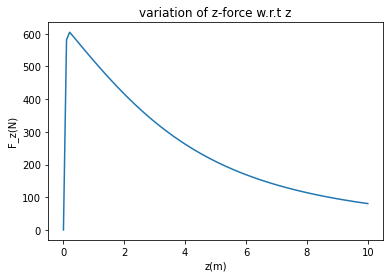

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt


from numpy import ones,copy,cos,tan,pi,linspace


def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w



def f(x,y,z):
    G=6.674e-11
    return ((z)/((x**2+y**2+z**2)**(3/2)))


def int_f(low, high, N, y, z):
    x,w=gaussxwab(N, low, high)
    val=0
    for i in range(N):
        val+=(w[i])*(f(x[i], y, z))
    return val

def int_int_f(low, high, N, z):
    y,w=gaussxwab(N, low, high)
    val=0
    for i in range(N):
        val+=(w[i])*(int_f(low, high, N, y[i], z))
    return val

def gravity_z(z):
    low=-5
    high=5
    N=100
    sigma=1e2
    return int_int_f(low, high, N, z)*sigma

z=np.linspace(0,10,100)
gravity=[]
for i in range(100):
    gravity.append(gravity_z(z[i]))
    
plt.plot(z,gravity)
plt.xlabel('z(m)')
plt.ylabel('F_z(N)')
plt.title('variation of z-force w.r.t z')

    
    

This is an error of the gaussian quadrature.

# Question 18

In [27]:
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt

def f(z):
    return cmath.exp(2*z)

def deriv(m,N):
    sum=0
    for k in range(N):
        num=cmath.exp(complex(0,(2*math.pi*k)/N))
        sum+= f(num)*(cmath.exp(complex(0,(-2*math.pi*k*m)/N)))
    sum=(math.factorial(m)/N)*sum
    return sum
N=10000
for i in range(1,21):
    print(deriv(i,N).real)
        
    

1.999999999999993
3.99999999999999
8.000000000000002
16.000000000000018
32.00000000000003
64.00000000000026
128.00000000000168
255.99999999998894
511.9999999999226
1024.000000000446
2048.0000000048944
4095.9999997308005
8191.999997537425
16383.999963805347
32767.999499965485
65535.99608144405
131071.9378405642
262142.83101705124
524273.9928697285
1048135.2847953342


# Question 17

Part a

We assume the charges to be at coordinates{ $(2.5\sqrt{2},2.5\sqrt{2})$ and $(-2.5\sqrt{2},-2.5\sqrt{2})$} centimeter respectively, to avoid infinite electric field or potential.

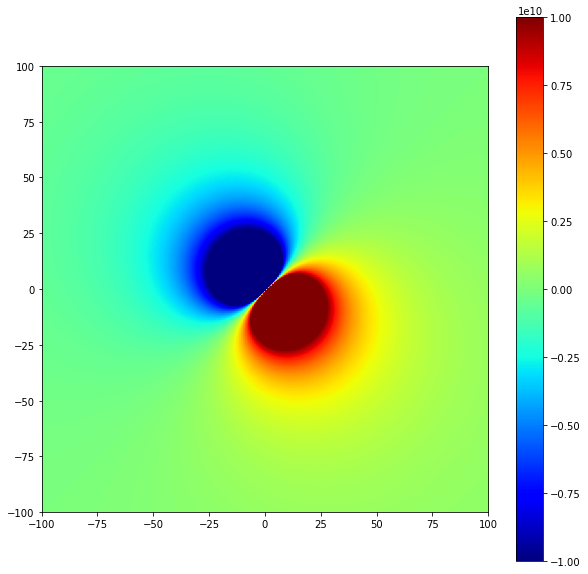

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

V=np.zeros((200,200))
x1=2.5*math.sqrt(2)
y1=2.5*math.sqrt(2)
x2=-2.5*math.sqrt(2)
y2=-2.5*math.sqrt(2)
q=1
k=8.99e9
for i in range(200):
    for j in range(200):
        r1=math.sqrt((j-x1-100)**2+(i-y1-100)**2)
        r2=math.sqrt((j-x2-100)**2+(i-y2-100)**2)
        V[j][i]=k*(1/r1-1/r2)*1e2
#print(vol[-100])
plt.figure(figsize=(10,10))        
plt.imshow(V, extent=[-100,100,-100,100], vmax=1e10, vmin=-1e10)
plt.jet()
plt.colorbar()
#print(vol[4,4]-vol[2,2])

Part-b:
For derivative calculation, we take nearest neighbour forward.


In [2]:
E_x=np.zeros((200,200))
E_y=np.zeros((200,200))

for i in range(199):
    for j in range(200):
        E_x[j][i]=V[j][i+1]-V[j][i]
        E_x[j][199]=E_x[j][198]

for i in range(200):
    for j in range(199):
        E_y[j][i]=V[j+1][i]-V[j][i]
        E_y[199][i]=E_y[198][i]

E=np.zeros((200,200))
direc=np.zeros((200,200))

for i in range(200):
    for j in range(200):
        E[j][i]=math.sqrt(E_x[j][i]**2+E_y[j][i]**2)*1e2
        if(E_y[j][i]==0):
            direc[j][i]=0
        if(E_x[j][i]==0):
            direc[j][i]=math.pi/2
        elif(E_x[j][i]>0):
            direc[j][i]=math.atan(E_y[j][i]/E_x[j][i])
        elif(E_x[j][i]<0):
            direc[j][i]=math.atan(E_y[j][i]/E_x[j][i])+(math.pi)*(np.sign(E_y[j][i]))
            

            






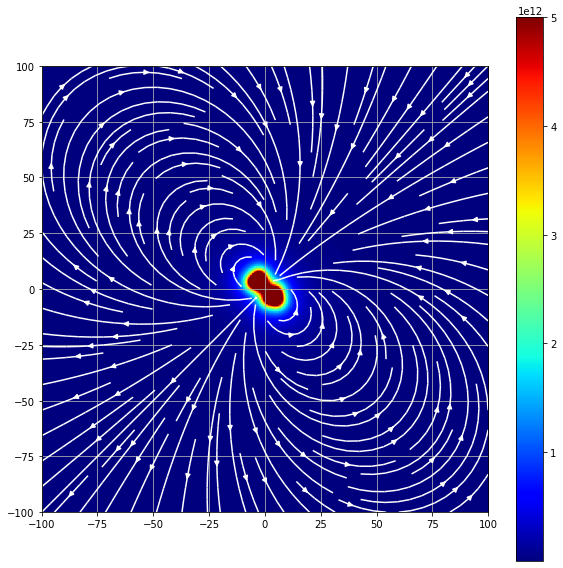

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(E, extent=[-100,100,-100,100], vmax=5e12)
plt.jet()
plt.colorbar()

X,Y=np.meshgrid(np.linspace(-100,100,200), np.linspace(-100,100,200))            
plt.streamplot(X,Y,E_x, E_y, density=1.2, linewidth=None, color='w')
plt.plot(-1,0)
plt.plot(1,0)
plt.grid()
plt.show()

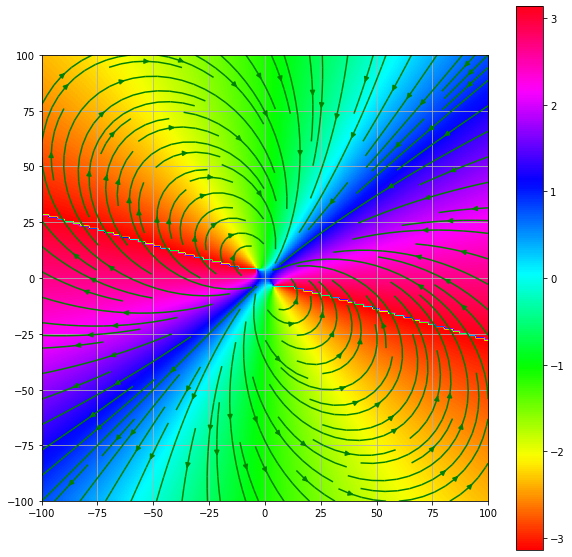

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(direc, extent=[-100,100,-100,100])
plt.hsv()
plt.colorbar()
X,Y=np.meshgrid(np.linspace(-100,100,200), np.linspace(-100,100,200))            
plt.streamplot(X,Y,E_x,E_y, density=1.2, linewidth=None, color='g')
plt.plot(-1,0)
plt.plot(1,0)
plt.grid()
plt.show()


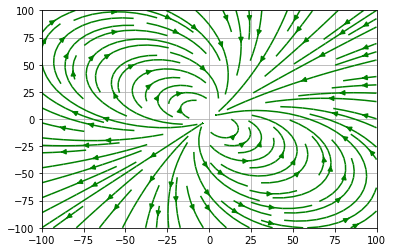

In [12]:
X,Y=np.meshgrid(np.linspace(-100,100,200), np.linspace(-100,100,200))            
plt.streamplot(X,Y,E_x,E_y, density=1, linewidth=None, color='g')
plt.plot(-1,0)
plt.plot(1,0)
plt.grid()
plt.show()

In [ ]:
def sigma(q_0,x,y,x_0,y_0,L):
    return (q_0*(math.sin(2*math.pi*x)/L)*(math.sin(2*math.pi*y)/L))/math.sqrt((x-x_0)**2+(y-y_0)**2)

from numpy import ones,copy,cos,tan,pi,linspace


def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def int_f(low, high, N, y, x_0, y_0):
    x,w=gaussxwab(N, low, high)
    val=0
    for i in range(N):
        val+=(w[i])*(sigma(q_0,x[i],y,x_0,y_0,L))
    return val

def V(low, high, N, x_0, y_0):
    y,w_1=gaussxwab(N, low, high)
    val=0
    for i in range(N):
        val+=(w_1[i])*(int_f(low, high, N, y[i], x_0, y_0))
    return val

q_0=100
L=0.1
P=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        P[j][i]=V(-L,L, 50, j-50, i-50)
plt.figure(figsize=(15,15))        
plt.imshow(P)
plt.title()
    

# Question 19


1024 512


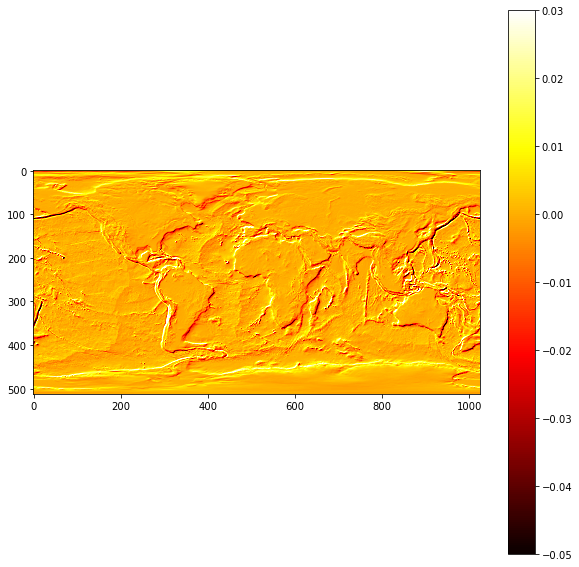

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math

w=np.loadtxt(r'altitude.txt')

dw_dx=np.zeros(w.shape)
dw_dy=np.zeros(w.shape)
h=30000
r=w.shape[1]
c=w.shape[0]
print(r,c)

for i in range(r-1):
    for j in range(c):
        dw_dx[j][i]=(w[j][i+1]-w[j][i])/h
        dw_dx[j][r-1]=dw_dx[j][r-2]
for i in range(r):
    for j in range(c-1):
        dw_dy[j][i]=(w[j+1][i]-w[j][i])/h
        dw_dy[c-1][i]=dw_dx[c-2][i]

#part b
I=np.zeros(w.shape)
phi=math.pi/4
for i in range(r):
    for j in range(c):
        I[j][i]=(math.cos(phi)*dw_dx[j][i]+math.sin(phi)*dw_dy[j][i])/math.sqrt(1+ dw_dx[j][i]**2 + dw_dy[j][i]**2)
    
    
plt.figure(figsize=(10,10))
plt.imshow(I, vmax=0.03, vmin=-0.05)
plt.hot()
plt.colorbar()

        



As we can see the deviation in the height w.r.t the h=30000m separation is too small and also the matrix made from altitude text is 512 x 1024 big. So, I calculate the derivative by:
$$f'(x)=\frac{f(x+h)-f(x)}{h}$$
I did this till the second last interval in each row and column(row for $\frac{dw}{dx}$, column for $\frac{dw}{dy}$). The last interval derivative value was then assigned equal to that of the second last interval. 

676 663


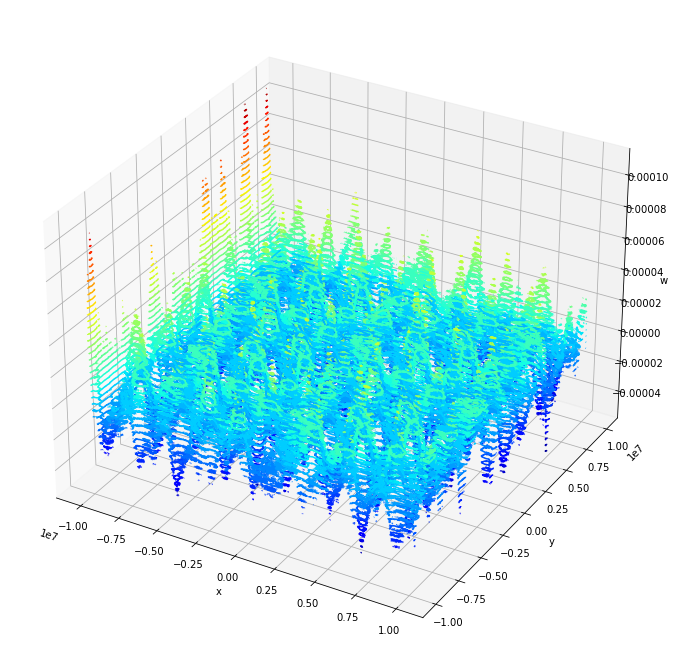

In [46]:
#part c

import numpy as np
import matplotlib.pyplot as plt
import math

w=np.loadtxt(r'stm.txt')

dw_dx=np.zeros(w.shape)
dw_dy=np.zeros(w.shape)
h=30000
r=w.shape[1]
c=w.shape[0]
print(r,c)

for i in range(r-1):
    for j in range(c):
        dw_dx[j][i]=(w[j][i+1]-w[j][i])/h
        dw_dx[j][r-1]=dw_dx[j][r-2]
for i in range(r):
    for j in range(c-1):
        dw_dy[j][i]=(w[j+1][i]-w[j][i])/h
        dw_dy[c-1][i]=dw_dx[c-2][i]

#part b
I=np.zeros(w.shape)
phi=math.pi/4
for i in range(r):
    for j in range(c):
        I[j][i]=(math.cos(phi)*dw_dx[j][i]+math.sin(phi)*dw_dy[j][i])/math.sqrt(1+ dw_dx[j][i]**2 + dw_dy[j][i]**2)
        
x=np.linspace((-h*r)/2, (h*r)/2, r)
y=np.linspace((-h*c)/2, (h*c)/2, c)

fig=plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.contour3D(x, y, I, 50, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w');

# Question 16


Part-A: The separation between slits is given by $\frac{\pi}{\alpha}$

In [27]:
#Part B
#The length scale is considered to be in \mu m
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt


def q(u,s):
    alpha=math.pi/s
    return (math.sin(alpha*u))**2

Text(0, 0.5, 'Intensity')

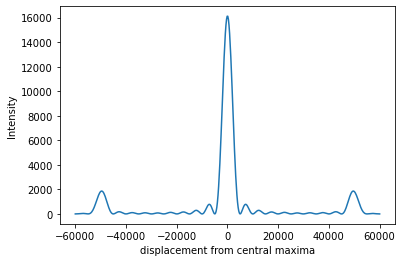

In [43]:
#Part C
#Total length is s*10=200 mu m => w=200

w=200
s=20
wave_l=0.5
f=1e6
l=1e5

from numpy import ones,copy,cos,tan,pi,linspace


def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


def dI(w,s,wave_l,f,x,u,q):
    return math.sqrt(q(u,s))*cmath.exp((2*math.pi*(x)*u*1j)/f)

def I_x(wid,s,wave_l,f,x,N):
    u,w=gaussxwab(N,-wid/2, wid/2)
    val=0
    for i in range(N):
        val+= w[i]*dI(wid,s,wave_l,f,x,u[i],q)
    return (np.absolute(val))**2

x=np.linspace(-6e4, 6e4,500)
I=[]
N=100
for i in range(500):
    I.append(I_x(w,s,wave_l,f,x[i],N))
    
plt.plot(x,I)
plt.xlabel('displacement from central maxima')
plt.ylabel('Intensity')
    
    
    


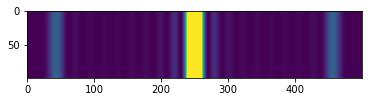

In [45]:
grid=np.zeros((100,500))
for i in range(0,500):
    for j in range(0,100):
        grid[j][i]=I[i]
        
plt.imshow(grid, vmax=6000)

In [46]:
def q_1(u,s):
    alpha=math.pi/s
    beta=math.pi/(2*s)
    return q(u,s)*(math.sin(alpha*u))**2*(math.sin(beta*u))**2

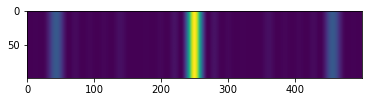

In [49]:
def dI(w,s,wave_l,f,x,u,q):
    return math.sqrt(q(u,s))*cmath.exp((2*math.pi*(x)*u*1j)/f)

def I_x(wid,s,wave_l,f,x,N):
    u,w=gaussxwab(N,-wid/2, wid/2)
    val=0
    for i in range(N):
        val+= w[i]*dI(wid,s,wave_l,f,x,u[i],q_1)
    return (np.absolute(val))**2

x=np.linspace(-6e4, 6e4,500)
I_1=[]
N=100
for i in range(500):
    I_1.append(I_x(w,s,wave_l,f,x[i],N))
    
    
grid_1=np.zeros((100,500))
for i in range(0,500):
    for j in range(0,100):
        grid_1[j][i]=I_1[i]
        
plt.imshow(grid)

Text(0, 0.5, 'Intensity')

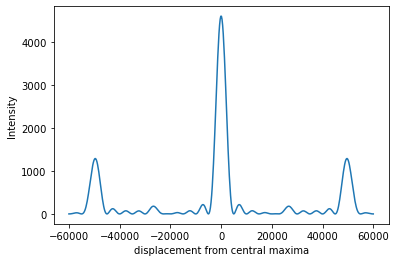

In [50]:
plt.plot(x,I_1)
plt.xlabel('displacement from central maxima')
plt.ylabel('Intensity')

In [ ]:
#PART E_II

